In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import sqrt, fabs

In [2]:
df = pd.read_csv("laba1_2.csv", sep=';')

In [3]:
df

,theta,number_channel
0,0,864
1,10,832
2,20,793
3,30,725
4,40,662
5,50,594
6,60,520
7,70,463
8,80,416
9,90,372


In [4]:
theta = np.array(df['theta'])
number_channel = np.array(df['number_channel'])

In [5]:
# переводим в радианы
theta = np.pi / 180 * theta

In [6]:
theta

array([0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
       0.87266463, 1.04719755, 1.22173048, 1.3962634 , 1.57079633,
       1.74532925, 1.91986218, 2.0943951 ])

In [7]:
ox = 1 - np.cos(theta)

In [8]:
oy = 1 / number_channel

In [9]:
ox 

array([0.        , 0.01519225, 0.06030738, 0.1339746 , 0.23395556,
       0.35721239, 0.5       , 0.65797986, 0.82635182, 1.        ,
       1.17364818, 1.34202014, 1.5       ])

In [10]:
oy

array([0.00115741, 0.00120192, 0.00126103, 0.00137931, 0.00151057,
       0.0016835 , 0.00192308, 0.00215983, 0.00240385, 0.00268817,
       0.00286533, 0.00322581, 0.0035461 ])

In [11]:
# погрешности для 1/N(\Theta) и (1 - cos(\theta))
sigma_N = 10
sigma_theta = 0.0174533
errorbar_y = [sigma_N/i**2 for i in number_channel] 
errorbar_x = [np.sin(i) * sigma_theta for i in theta]


In [12]:
errorbar_x

[0.0,
 0.0030307337392742354,
 0.005969380167505894,
 0.008726649999999999,
 0.011218764988142076,
 0.01337000347908846,
 0.015115001179870944,
 0.016400737218362695,
 0.017188145155647972,
 0.0174533,
 0.017188145155647972,
 0.016400737218362698,
 0.015115001179870947]

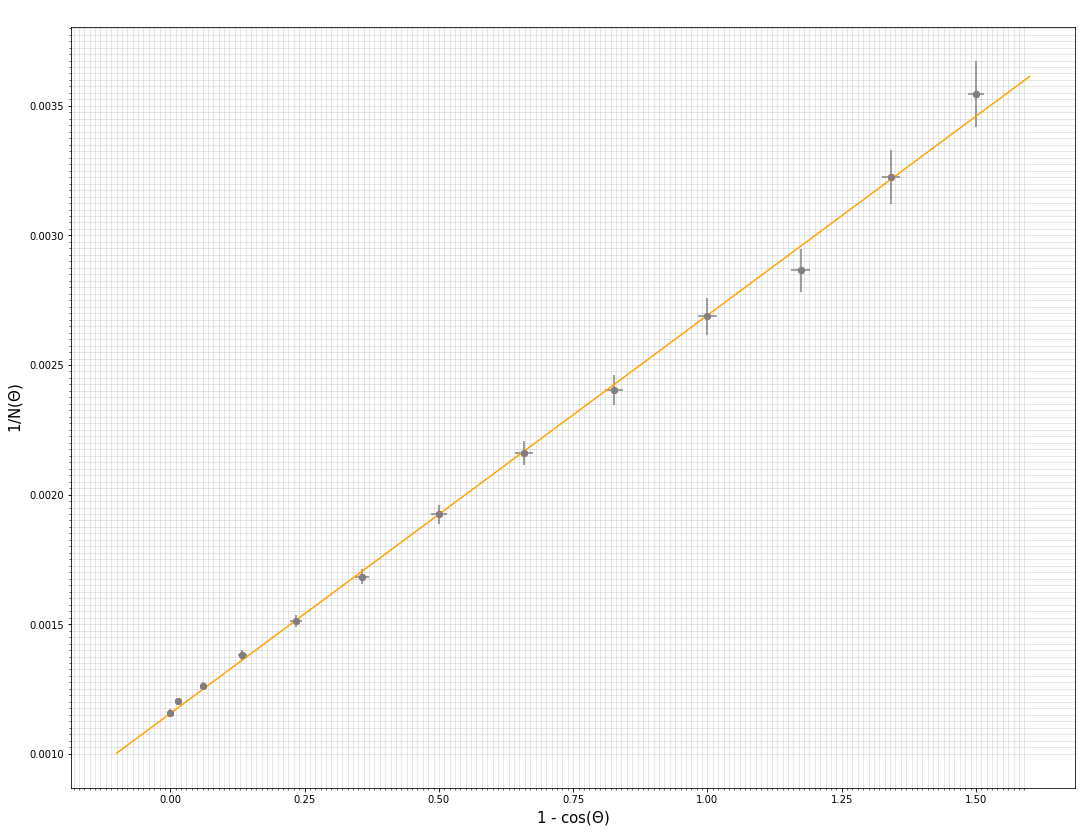

In [13]:
fig = plt.figure(figsize=(18, 14)); 
ax = fig.gca()
ax.set_xticks(np.arange(-0.2, 1.6, 0.01), minor=True) # это для мелких делений по оси ОХ
ax.set_yticks(np.arange(0.001, 0.004, 0.000025), minor=True) # аналогично для OY
ax.grid(which='minor', alpha=0.4, linestyle='-')

plt.title(' ', fontsize=18); 
# plt.grid(ls='-')

# plt.plot(ox, oy, lw=2, label='Длина волны', color='black')
mnk_coef = np.polyfit(ox, oy, 1) # считаем коэфф-ты аппроксимирующей прямой
xp = np.linspace(-0.1, 1.6, 100)
p = np.poly1d(mnk_coef) # создаем полином с коэффициентами (убывающими по степени) из массива mnk_coef_f1
# test1 = np.poly1d([mnk_coef[0] + sigma_k, mnk_coef[1] + sigma_c]) 
# test2 = np.poly1d([mnk_coef[0] - sigma_k, mnk_coef[1] - sigma_c]) 


_ = plt.plot(xp, p(xp), color='orange', ) # рисуем точки и аппроксимирующую прямую


plt.xlabel('1 - cos($\Theta$)', fontsize=15); 
plt.ylabel('1/N($\Theta$)', fontsize=15)
plt.scatter(ox, oy, color='red')

plt.errorbar(ox, oy, yerr=errorbar_y, xerr=errorbar_x,fmt='o', color='grey')
plt.show()

In [14]:
# Ниже реализованы функции, которые считают погрешности для коэффициентов k и с, 
# найденных с помощью метода наименьших квадратов (y = kx + c)
# rmse означает root mean square error
def get_rmse_k(x, y, k, n):
    return  sqrt(fabs(((np.mean(y ** 2) - ((np.mean(y)) ** 2)) /
                 ((np.mean(x ** 2) - 
                   ((np.mean(x)) ** 2)))) - (k ** 2))) / sqrt(n)

def get_rmse_c(x, y, sigma_k, n):
    return sigma_k * sqrt(np.mean(x ** 2) - ((np.mean(x)) ** 2))

In [273]:
mnk_coef

array([0.00153645, 0.00115543])

In [274]:
sigma_k = get_rmse_k(ox, oy, mnk_coef[0], 13)
sigma_c = get_rmse_c(ox, oy, sigma_k, 13)

In [275]:
sigma_k, sigma_c

(2.052604251648306e-05, 1.0369277946083052e-05)

In [276]:
print(np.poly1d(p))

 
0.001536 x + 0.001155


In [19]:
E_gamma = 662 * 10**3 # эВ, значение из лабника

In [22]:
# cos(\theta) = 1, т.е. \theta = 0
theta_0 = p(0)
sigma_theta_0 = errorbar_y[9]
theta_0, sigma_theta_0


(0.001155432920689506, 7.226268932824603e-05)

In [23]:
# cos(\theta) = 0, т.е. \theta = pi/2
theta_90 = p(1)
sigma_theta_90 = errorbar_y[0]
theta_90, sigma_theta_90

(0.002691880810258882, 1.3395919067215363e-05)

In [24]:
N_0 = 1 / theta_0
N_0

865.4764652224455

In [25]:
N_90 = 1 / theta_90
N_90

371.4874730667695

In [209]:
ans = E_gamma * N_90 / (N_0 - N_90)

In [210]:
# значение в лабе, которое мы ищем (энергию покоя электрона), настоящее значение равно примерно 511 кэВ,
# так что мы близки к истине
ans # эВ

497834.3871531059

In [211]:
# это не нужно, лишние подсчеты
# sigma_N_0 = 1/theta_0**2 * sigma_theta_0
# sigma_N_0

54.12833216657554

In [212]:
# # это тоже не нужно
# sigma_N_90 = 1/theta_90**2 * sigma_theta_90
# sigma_N_90

1.8486762507171344

In [ ]:
# правильные погрешности
sigma_N_0 = 10
sigma_N_90 = 10

In [26]:
sigma_ans =  np.sqrt((sigma_N_0**2 * ( E_gamma * N_0 / (N_0 - N_90)**2) **2  + sigma_N_90**2 * (E_gamma / (N_0 - N_90))**2))

In [27]:
sigma_ans

27034.25410575179

# ROUND THEM ALL!!!
тупо округление, чтобы красиво забить значения в табличку, потому что больше ведь заняться нечем 
)))

In [277]:
theta = np.around(theta, decimals=4)
theta

array([0.    , 0.1745, 0.3491, 0.5236, 0.6981, 0.8727, 1.0472, 1.2217,
       1.3963, 1.5708, 1.7453, 1.9199, 2.0944])

In [278]:
ox = np.around(ox, decimals=4)
ox

array([0.    , 0.0152, 0.0603, 0.134 , 0.234 , 0.3572, 0.5   , 0.658 ,
       0.8264, 1.    , 1.1736, 1.342 , 1.5   ])

In [279]:
errorbar_x = np.around(errorbar_x, decimals=4)
errorbar_x

array([0.    , 0.003 , 0.006 , 0.0087, 0.0112, 0.0134, 0.0151, 0.0164,
       0.0172, 0.0175, 0.0172, 0.0164, 0.0151])

In [280]:
oy = np.around(oy, decimals=5)
oy

array([0.00116, 0.0012 , 0.00126, 0.00138, 0.00151, 0.00168, 0.00192,
       0.00216, 0.0024 , 0.00269, 0.00287, 0.00323, 0.00355])

In [281]:
errorbar_y = np.around(errorbar_y, decimals=5)
errorbar_y

array([1.0e-05, 1.0e-05, 2.0e-05, 2.0e-05, 2.0e-05, 3.0e-05, 4.0e-05,
       5.0e-05, 6.0e-05, 7.0e-05, 8.0e-05, 1.0e-04, 1.3e-04])

In [288]:
df['theta_radians'] = theta
df['sigma_theta'] = 1
df['sigma_N'] = 10
df['1-cos(theta)'] = ox
df['sigma_1-cos(theta)'] = errorbar_x
df['1/N'] = oy
df['sigma_1/N'] = errorbar_y

In [289]:
df.to_csv('data.csv', sep = ',', index = True)

| $\theta$, (degrees) 	| N   	| $\theta$, (radians) 	| $\sigma_{\theta}$ 	| $\sigma_N$ 	| 1-$cos(\theta)$ 	| $\sigma_{(1-cos(\theta))}$ 	| 1/N     	| $\sigma_{1/N}$ 	|
|---------------------	|-----	|---------------------	|-------------------	|------------	|------------------	|----------------------------	|---------	|----------------	|
| 0                   	| 864 	| 0.0000              	| 1                 	| 10         	| 0.0000         	| 0.0000                     	| 0.00116 	| 1e-05          	|
| 10                  	| 832 	| 0.1745              	| 1                 	| 10         	| 0.0152         	| 0.0030                     	| 0.00120 	| 1e-05          	|
| 20                  	| 793 	| 0.3491              	| 1                 	| 10         	| 0.0603         	| 0.0060                     	| 0.00126 	| 2e-05          	|
| 30                  	| 725 	| 0.5236              	| 1                 	| 10         	| 0.1340         	| 0.0087                     	| 0.00138 	| 2e-05          	|
| 40                  	| 662 	| 0.6981              	| 1                 	| 10         	| 0.2340         	| 0.0112                     	| 0.00151 	| 2e-05          	|
| 50                  	| 594 	| 0.8727              	| 1                 	| 10         	| 0.3572         	| 0.0134                     	| 0.00168 	| 3e-05          	|
| 60                  	| 520 	| 1.0472              	| 1                 	| 10         	| 0.5000         	| 0.0151                     	| 0.00192 	| 4e-05          	|
| 70                  	| 463 	| 1.2217              	| 1                 	| 10         	| 0.6580         	| 0.0164                     	| 0.00216 	| 5e-05          	|
| 80                  	| 416 	| 1.3963              	| 1                 	| 10         	| 0.8264         	| 0.0172                     	| 0.00240 	| 6e-05          	|
| 90                  	| 372 	| 1.5708              	| 1                 	| 10         	| 1.0000         	| 0.0175                     	| 0.00269 	| 7e-05          	|
| 100                 	| 349 	| 1.7453              	| 1                 	| 10         	| 1.1736         	| 0.0172                     	| 0.00287 	| 8e-05          	|
| 110                 	| 310 	| 1.9199              	| 1                 	| 10         	| 1.3420         	| 0.0164                     	| 0.00323 	| 0.0001         	|
| 120                 	| 282 	| 2.0944              	| 1                 	| 10         	| 1.5000         	| 0.0151                     	| 0.00355 	| 0.00013        	|